## Useful imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Raw data inports and rearanging

In [2]:
j = "73 40 84 107 52 36 13 74 36 94 93 46 123 24 100 93 62 49 97 102 80 37 22 25 72 48 40 74 32 31 136 64 99 37 44 36 104 74 112 40 65 67 50 143 23 26 91 20 142 128 9 77 40 26 55 104 59 112 42 69 87 89 2 11 105 43 105 23 21 88 57 40 52 63 35 141 54 27 45 37 21 37 102 38 36 117 57 93 24 52 83 133 51 102 34 52 39 54 64 146 127 100 58 50 49 40 55 123 64 30 127 63 19 59 31 22 68 37 107 68 52 61 35 38 76 44 21 144 21 40 105 48 97 70 74 95 75 28 25 40 81 72 58 99 52 5 72 84 53 21 110 97 30 43 92 109 39 89 51 30 102 94 13 45 93 94 90 104 36 55 92 12 45 126 73 132 118 127 125 26 83 69 49 39 4 63 84 47 75 43 82 43 51 28 118 110 42 2 53 74 54 57 92 23 72 95 76 35 38 100 52 34 58 74 86 25 32 61 39 55 76 68 107 82 97 108 57 38 88 71 22 40 63 37 80 51 52 52 67 101 49 46 100 52 63 36 53 45 51 56 71 50 13 29 18 36 87 86 39 11 148 74 74 121 11 28 65 79 32 85 95 26 43 123 81 78 25 100 27 90 53 60 100 25 72 80 83 40 62 53 40 97 105 56 49 100 36 46 80 8 23 58 78 58 24 78 67 62 85 80 39 34 62 33 58 130 41 34 33 62 129 79 103 104 56 33 118 96 21 18 65 140 87 91 61 54 137 71 84 35 75 32 4 68 37 80 78 91 75 52 74 96 32 85 42 78 119 58 16 44 24 98 121 76 16 56 112 67 58 46 76 45 41 94 55 44 51 136 63 34 86 87 64 54 27 69 31 64 138 56 97 81 40 132 64 114 105 41 52 60".split()

In [3]:
int_array = list(map(int,j))

What is the distribution of product weights? If there are lots of heavy jobs, it might influence our decisions.

(array([ 7.,  9., 17., 26., 36., 38., 38., 31., 27., 27., 28., 21., 21.,
        26., 12.,  8.,  8.,  9.,  5.,  6.]),
 array([  2. ,   9.3,  16.6,  23.9,  31.2,  38.5,  45.8,  53.1,  60.4,
         67.7,  75. ,  82.3,  89.6,  96.9, 104.2, 111.5, 118.8, 126.1,
        133.4, 140.7, 148. ]),
 <BarContainer object of 20 artists>)

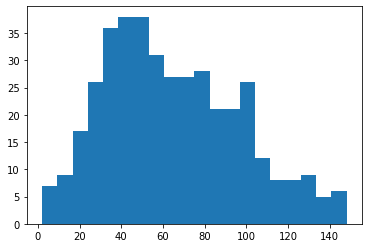

In [4]:
plt.hist(int_array,bins=20)

Turns out most products are quite light, well below our drone capacity of 200u.

In [5]:
np.mean(int_array)

64.5875

## Reading in the full dataset
Time to read in the full set

In [6]:
phil = open('busy_day.in','r')
#phil = open('test_1.txt','r')

In [7]:
data = phil.read().split("\n")
phil.close()

In [8]:
data

['400 600 30 112993 200',
 '400',
 '73 40 84 107 52 36 13 74 36 94 93 46 123 24 100 93 62 49 97 102 80 37 22 25 72 48 40 74 32 31 136 64 99 37 44 36 104 74 112 40 65 67 50 143 23 26 91 20 142 128 9 77 40 26 55 104 59 112 42 69 87 89 2 11 105 43 105 23 21 88 57 40 52 63 35 141 54 27 45 37 21 37 102 38 36 117 57 93 24 52 83 133 51 102 34 52 39 54 64 146 127 100 58 50 49 40 55 123 64 30 127 63 19 59 31 22 68 37 107 68 52 61 35 38 76 44 21 144 21 40 105 48 97 70 74 95 75 28 25 40 81 72 58 99 52 5 72 84 53 21 110 97 30 43 92 109 39 89 51 30 102 94 13 45 93 94 90 104 36 55 92 12 45 126 73 132 118 127 125 26 83 69 49 39 4 63 84 47 75 43 82 43 51 28 118 110 42 2 53 74 54 57 92 23 72 95 76 35 38 100 52 34 58 74 86 25 32 61 39 55 76 68 107 82 97 108 57 38 88 71 22 40 63 37 80 51 52 52 67 101 49 46 100 52 63 36 53 45 51 56 71 50 13 29 18 36 87 86 39 11 148 74 74 121 11 28 65 79 32 85 95 26 43 123 81 78 25 100 27 90 53 60 100 25 72 80 83 40 62 53 40 97 105 56 49 100 36 46 80 8 23 58 78 58 24 78 67

Extract the warehouse information so we can plot their locations.

In [9]:
map_data = data[0]
product_data = data[2]
num_warehouses = int(data[3])
warehouse_locations = []

for i in range(0,num_warehouses*2,2):
    warehouse_locations.append(data[4+i])
    
xlocs = [int(x.split()[0]) for x in warehouse_locations]
ylocs = [int(x.split()[1]) for x in warehouse_locations]

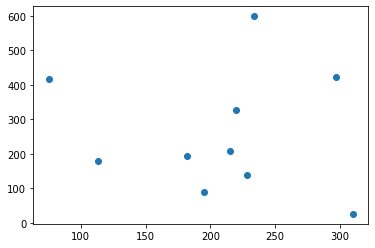

In [10]:
plt.plot(xlocs,ylocs, marker='o', linestyle = 'none')

In [11]:
num_jobs = int(data[24])
job_locations = []
for i in range(0,num_jobs*3,3):
    job_locations.append(data[25+i])

In [12]:
job_locations_x = [int(x.split()[0]) for x in job_locations]
job_locations_y = [int(x.split()[1]) for x in job_locations]

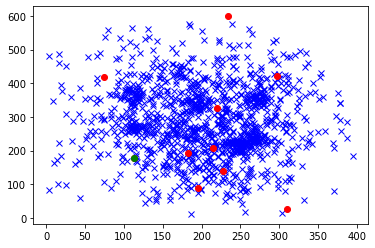

In [13]:
plt.plot(job_locations_x,job_locations_y, marker='x', linestyle = 'none',color='blue')
plt.plot(xlocs,ylocs, marker='o', linestyle = 'none',color='red')
plt.plot(xlocs[0],ylocs[0], marker='o', linestyle = 'none',color='green')

## Bibby's master plan
1. Create perfect distribution from closest customer to warehouses
2. Assign drones closest order (multiple items?)
      based on remaining weight, assign following jobs based on weight/distance balance
3. Actually ship product
4. Win


In [14]:
# get locations of warehouses and jobs in numpy format for distance checking
wlocs = np.zeros([len(xlocs),2])
for c,val in enumerate(wlocs):
    val[0] = xlocs[c]
    val[1] = ylocs[c]
    
jlocs = np.zeros([len(job_locations_x),2])
for c,val in enumerate(jlocs):
    val[0] = job_locations_x[c]
    val[1] = job_locations_y[c]

In [15]:
import JHelpers as jh

In [16]:
# testing set the closest warehouse
closest_warehouse = np.empty(len(job_locations_x))

for j,job in enumerate(jlocs):
    closest_distance = np.Infinity
    for c,warehouse in enumerate(wlocs):
        dist = jh.npdistance(job,warehouse)
        if dist < closest_distance:
            closest_distance = dist
            closest_warehouse[j] = c


In [17]:
closest_warehouse

array([9., 4., 4., ..., 4., 0., 5.])

## Stock allocation
For each warehouse, work out the demand of each product based on jobs assigned.

Then, work out if stock is required or in surplus for each product.


Make a class for products and store these in a dictionary:


In [18]:
class Product:
    def __init__(self,id_IN,weight_IN):
        self.id = id_IN
        self.weight = weight_IN


In [19]:
product_data = {}

for pid, weights in enumerate(data[2].split()):
    #print(pid,weights)
    new_product = Product(pid,weights)
    product_data.update({new_product.id:new_product})

In [20]:
# An example of how to access the data:
## print(product_data[0].id,product_data[0].weight)

In [21]:
''' Warehouse object. '''
class Warehouse:
    def __init__(self,id_IN,location_IN,stock_IN,assigned_orders_IN):
        self.id = id_IN # a unique ID of the warehouse
        self.location = location_IN # a numpy list of size [1,2] containing the vector location
        self.stock = stock_IN # a np array of current stock of each product, values = current stock
        self.assigned_orders = assigned_orders_IN # a list of Order objects
        self.request = [] # requested items from orders
        self.excess = []  # excess items from orders
        self.diff = []    # difference between requested and initial stock
        self.demand = []  # items needed to fulfill orders

    ''' Calculate the stock needed for all assigned orders '''
    def stockCalculation(self):
        self.demand = np.zeros(int(data[1]), dtype = np.intc)
        #supply = self.stock
        for order in self.assigned_orders:
            prods = order.listOfProductIDs()
            for prod in prods:
                self.demand[prod] += 1
        self.diff = self.stock-self.demand

        self.request = np.zeros_like(self.demand)
        self.excess  = np.zeros_like(self.demand)
        for c,item in enumerate(self.diff):
            if item < 0:
                self.request[c] = -item
            elif item > 0:
                self.excess[c] = item

class Order:
    def __init__(self,id_IN,location_IN,assigned_warehouse_id_IN,product_objects_IN):
        self.id = id_IN # a unique ID of the order
        self.location = location_IN # a numpy list of size [1,2] containing the vector location
        self.assigned_warehouse_ID = assigned_warehouse_id_IN # the unique ID of the warehouse
        self.product_objects = product_objects_IN # a list of Product objects that make up this order

    def listOfProductIDs(self):
        retval = [int(x.id) for x in self.product_objects]
        return retval


In [22]:
all_warehouses = []
all_orders = []


# First loop through all orders and create an object with all information
# num_jobs = int(data[24]) - already calculated earlier
for i in range(0,num_jobs*3,3):
    #job locations is at (data[25+i])
    #number of products in job is (data[25+i+1])
    #list of jobs is at (data[25+i+2])

    order_id = int(i/3) #needed because we're stepping by 3 each time
    order_location = np.array(data[25+i].split(),dtype=np.intc)
    order_assigned_warehouse = closest_warehouse[order_id]
    requested_products = [int(x) for x in data[25+i+2].split()]
    order_products = [Product(x,product_data[x]) for x in requested_products]
    this_order = Order(order_id,order_location,order_assigned_warehouse,order_products)
    all_orders.append(this_order)

# Create warehouse objects and assign the list of orders
for i in range(0,num_warehouses):

    wh_id = int(i)#needed because we're stepping by 2 each time
    wh_loc = np.array(data[4+(i*2)].split(),dtype=np.intc)
    wh_stock = np.array(data[4+(i*2)+1].split(),dtype=np.intc)
    list_of_orders = []
    for ord in all_orders:
        if ord.assigned_warehouse_ID == i:
            list_of_orders.append(ord)
    #print(len(list_of_orders))

    all_warehouses.append(Warehouse(i,wlocs[i],wh_stock,list_of_orders))


In [23]:
# Example run of stockCalculation function
wh1 = all_warehouses[0]

wh1.stockCalculation()

print("demand", wh1.demand[2])
print("stock", wh1.stock[2])
print("difference", wh1.diff[2])
print("requested", wh1.request[2])
print("excess", wh1.excess[2])

demand 4
stock 5
difference 1
requested 0
excess 1


In [24]:
for wh in all_warehouses:
    wh.stockCalculation()

## Redistribution

Now for the hard part - redistributing the goods. If we want to be clever, we should try and optimise this based on the drone's capacity, rather than have drones carry single items at a time.

In [25]:
warehouse_neighbours = [] #list of lists of clostest neighbours for each other warehouse

# for each warehouse
for wh in all_warehouses:
    myloc = wh.location
    closest_neighbours = {}
    for count,neigh in enumerate(all_warehouses):
        if (neigh != wh):
            closest_neighbours[count] = jh.npdistance(myloc,neigh.location)
            
    # from the dictionary, sort based on distance and make a list from the keys
    sortedl = [k for k, v in sorted(closest_neighbours.items(), key=lambda item: item[1])]
    
    #print("***")
    #print(sortedd)
    print(sortedl)
    
    warehouse_neighbours.append(sortedl)

[5, 3, 7, 2, 4, 6, 8, 9, 1]
[9, 6, 4, 3, 5, 0, 7, 2, 8]
[7, 5, 3, 0, 8, 4, 9, 6, 1]
[5, 7, 0, 4, 2, 8, 9, 6, 1]
[3, 9, 5, 6, 0, 7, 2, 1, 8]
[3, 7, 0, 2, 4, 8, 6, 9, 1]
[4, 9, 1, 0, 5, 3, 7, 2, 8]
[2, 3, 5, 0, 8, 4, 9, 6, 1]
[2, 7, 3, 5, 0, 4, 9, 6, 1]
[4, 1, 6, 3, 5, 7, 0, 2, 8]


In [27]:
print(all_warehouses[0].demand)
print(all_warehouses[0].stock)
print(all_warehouses[0].stock[31])
print(all_warehouses[5].excess[31])

[ 1  0  4  1  0  2  3  1  5  1  2  0  1  1  4  3 10  1  4  2  1  1  3  1
  0  1  3  4  6  4  4  2  2  0  0  9  3  4  4  1  1  6  1  3  0  5  3  1
  3  4  3  0  5  0  5  2  2  7  4  0  4  5  3  4  2  0  4  1  4  0  4  4
  0  3  2  1  1  0  5  1  1  2  0  4  3  5  4  2  1  2  5  0  1  0  2  0
  3  3  1  4  4  1  0  0  7  3  3  6  1  0  4  4  1  4  7  1  4  1  0  3
  2  5  5  4  0  1  2  7  3  5  3  1  2  6  0  1  4  2  2  3  1  0  3  1
  3  0  2  1  0  6  3  2  0  8  8  1  1  9  2  7  4  3  2  7  3  4  2  5
  6  1  2  0  3  3  3  4  1  0  1  5  3  4  1  6  6  3  2  0  1  4  0  1
  0  3  5  0  1  1  2  3  2  4  0  1  1  1  2  0  4  0  1  4  2  0  1  3
  6  2  3  4  6  7  3  5  3  8  0  4  6  1  3  5  1  5  0  4  0  4  7  5
  0  0  5  3  4  2  1  2  3  0  1  5  5  6  2  2  1  3  1  2  2  1  1  2
  0  5  1  2  0  1  3  0  4  1  1  4  5  4  6  0  1  1  4  5  2  3  5  2
  2  4  1  2  2  3  0  0  2  4  2  4  5  2  2  6  0  2  1  0  0  1  2  2
  2  0  4  1  0  1  0  0  0  1  1  3  2  3  1  3  2

In [ ]:
print(all_warehouses[0].demand[31])
for wh in all_warehouses:
    print(wh.excess[31])

In [ ]:
for wh in all_warehouses:
    print(wh.stock[31])

Note - after running the below cell, you will be changing the demand/supply lists

In [ ]:

redist_orders = []

for count,wh in enumerate(all_warehouses):
    if count == 0:
        my_demand = wh.demand
        print(my_demand)
        # create an order for distribution from each neighbour until my_demand is all zeroes
        for neighbour in warehouse_neighbours[count]:
            neighbourw = all_warehouses[neighbour]
            # if demand hasn't been satisfied
            print("requesting items from warehouse", neighbour, "for warehouse", count)
            if not all(item == 0 for item in my_demand):
                print("demand not all zero for wh", count)
                # for each product in demand list
                for prodID,demand_level in enumerate(my_demand):
                    # if the neighbour has excess of a product we demand

                    if neighbourw.excess[prodID] > 0 and demand_level > 0:
                        print(neighbourw.excess[prodID], demand_level)
                        # request either the all of the excess, or what we demand, whichever is smallest
                        req_prod_excess = np.amin([neighbourw.excess[prodID],demand_level])
                        print(req_prod_excess,neighbourw.excess[prodID],demand_level)
                        req_prod_list = [prodID for x in range(req_prod_excess)]
                        print(req_prod_list)
                        redist_orders.append(Order(id_IN=len(redist_orders),
                                                   location_IN =neighbourw.location,
                                                   assigned_warehouse_id_IN=neighbourw.id,
                                                   product_objects_IN=req_prod_list))
                        neighbourw.excess[prodID] -= req_prod_excess
                        my_demand[prodID] -= req_prod_excess
                        print(my_demand[prodID])
                        print("(end of adjustment for this prod from this wh)")
        #print(my_demand)
        print(my_demand)
    
    
    

In [ ]:
redist_orders[0].product_objects

In [ ]:
# Safety test to make sure that there's no more demand anywhere
for count,wh in enumerate(all_warehouses):
    if not all(item == 0 for item in wh.demand):
        print("ERROR - not all demand is satisfied for warehouse", count)
        for count,prod in enumerate(wh.demand):
            if (prod != 0):
                print("ID:", count, "Missing", prod)

In [ ]:
print(all_warehouses[0].demand)

In [ ]:
import numpy as np

arr = np.array([1,0,0,2])
arr2 = np.array([3,1,0,2])

diff = arr2 - arr
print(diff)

closest_neighbours[count] = jh.npdistance(myloc,neigh.location)
